In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt

In [2]:
os.chdir('E:\\Datasets')

In [3]:
df = pd.read_csv("Churn.csv")
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
df.shape

(3333, 21)

In [5]:
df = df.drop(['State','Area Code','Phone'],axis=1)

In [6]:
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73


In [7]:
x = df.drop(['Churn'],axis=1)
x.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73


In [8]:
y = df['Churn']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8,random_state=1)

In [11]:
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

In [12]:
# Decision tree on churn data 
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
import matplotlib.pyplot as plt

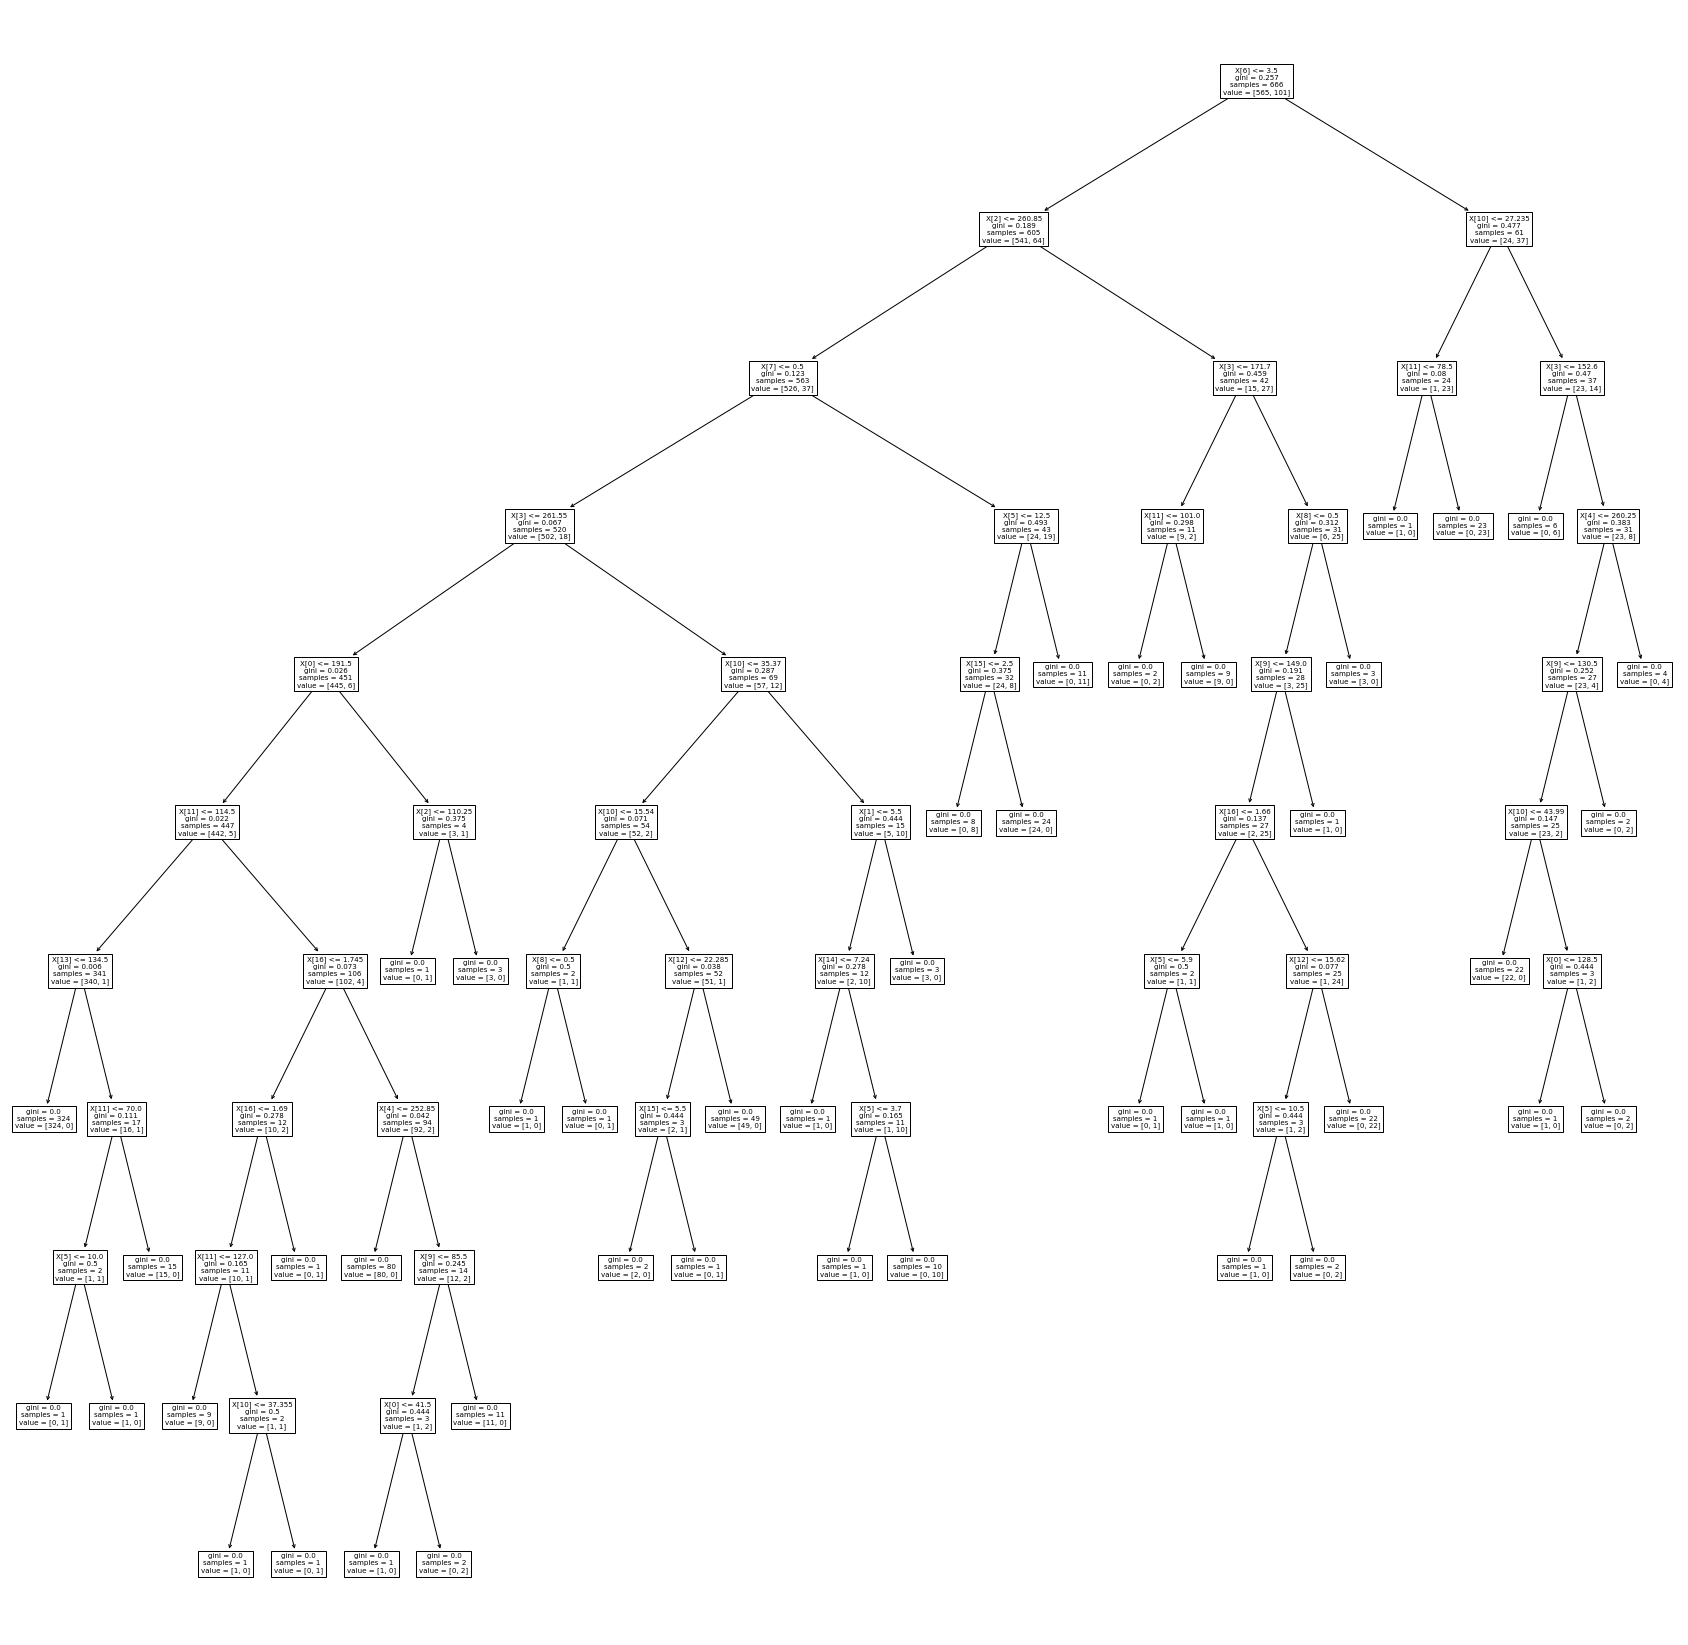

In [14]:
plt.figure(figsize = [30,30])
tree.plot_tree(dt)
plt.show()

In [15]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [16]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix

In [17]:
confusion_matrix(y_test,y_pred)

array([[2170,  115],
       [ 126,  256]], dtype=int64)

In [18]:
print('precision:',(259/(114+259)))
print('Recall:',(259/(123+259)))

precision: 0.6943699731903485
Recall: 0.6780104712041884


In [19]:
print('Accuracy_score : ',accuracy_score(y_test,y_pred))

Accuracy_score :  0.9096362954630671


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2285
           1       0.69      0.67      0.68       382

    accuracy                           0.91      2667
   macro avg       0.82      0.81      0.81      2667
weighted avg       0.91      0.91      0.91      2667



In [21]:
predicted_values = y_pred
predicted_values

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [22]:
my_submission = pd.DataFrame({'Actual_value': y_test[0:], 'predicted_values':predicted_values})

my_submission

,Actual_value,predicted_values
2360,0,0
600,0,0
1501,0,0
1114,0,0
517,0,0
...,...,...
3093,1,1
1952,0,0
66,0,0
1055,0,0


In [23]:
my_submission.to_csv('submission.csv', index=False)

# Prunning

In [24]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,20):
    dt = DecisionTreeClassifier(criterion='gini',max_depth=i)
    dt.fit(x_train,y_train)
    pred = dt.predict(x_train)
    acc_gini.append(accuracy_score(y_train,pred))
######    
    dt = DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dt.fit(x_train,y_train)
    pred = dt.predict(x_train)
    acc_entropy.append(accuracy_score(y_train,pred))
    
    max_depth.append(i)
    
    
d =pd.DataFrame({'acc_gini':pd.Series(acc_gini),
                'acc_entropy':pd.Series(acc_entropy),
                'max_depth':pd.Series(max_depth) })    
    
#d 

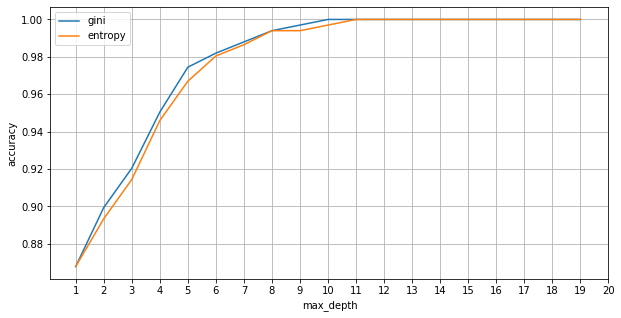

In [25]:
plt.figure(figsize = [10,5])
plt.plot('max_depth','acc_gini',data=d,label='gini',)
plt.plot('max_depth','acc_entropy',data=d,label='entropy')
plt.xlabel('max_depth',fontsize='10')
plt.ylabel('accuracy')
plt.xticks(np.arange(1,21))
plt.legend()
plt.grid()
plt.show()

In [26]:
max_depth = []
acc_train = []
acc_test = []
for i in range(1,20):
    dt = DecisionTreeClassifier(criterion='gini',max_depth=i)
    dt.fit(x_train,y_train)
    pred = dt.predict(x_train)
    pred2 = dt.predict(x_test)
    acc_train.append(accuracy_score(y_train,pred))
######    
    acc_test.append(accuracy_score(y_test,pred2))
#######   
    max_depth.append(i)
    
    
d =pd.DataFrame({'acc_train':pd.Series(acc_train),
                'acc_test':pd.Series(acc_test),
                'max_depth':pd.Series(max_depth) }) 
#d

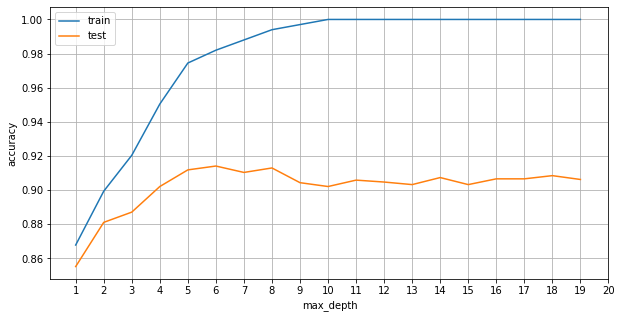

In [27]:
plt.figure(figsize = [10,5])
plt.plot('max_depth','acc_train',data=d,label='train',)
plt.plot('max_depth','acc_test',data=d,label='test')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(1,21))
plt.legend()
plt.grid()
plt.show()

In [28]:
dt = DecisionTreeClassifier(max_depth=6,criterion='gini')
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

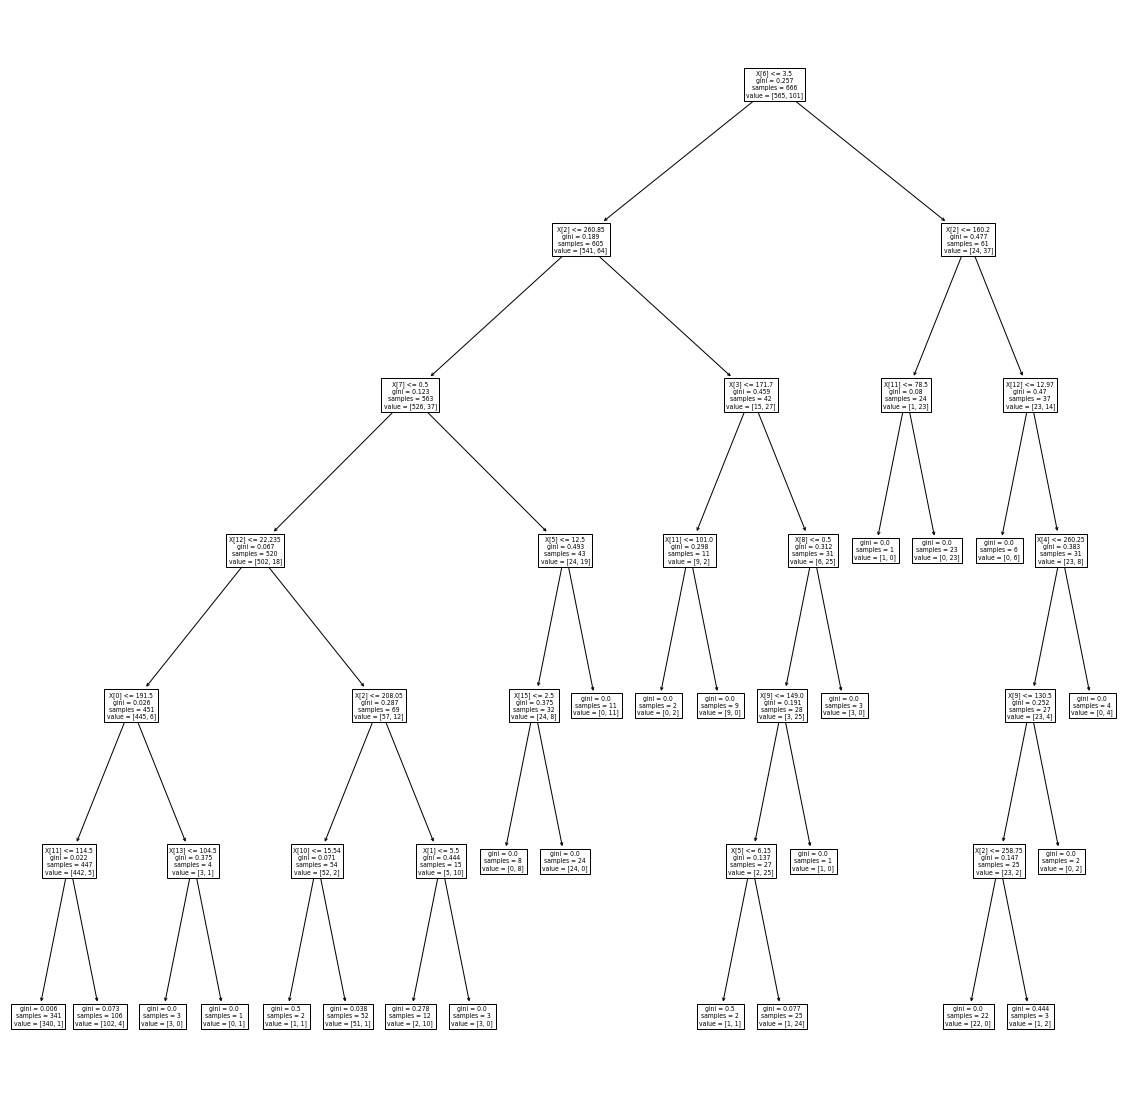

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=[20,20])
tree.plot_tree(dt)
plt.show()
plt.savefig('dt.png')

In [30]:
pred = dt.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
print(confusion_matrix(y_test,pred))

[[2177  108]
 [ 125  257]]


In [32]:
print(accuracy_score(y_test,pred))

0.9126359205099362


# Prunning

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [38]:
clf = DecisionTreeClassifier(max_depth=8,min_samples_leaf=20,random_state=123)

In [39]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [40]:
from sklearn.tree import plot_tree

[Text(870.3586956521739, 1019.25, 'X[6] <= 3.5\ngini = 0.257\nsamples = 666\nvalue = [565, 101]'),
 Text(721.7608695652174, 883.35, 'X[10] <= 44.345\ngini = 0.189\nsamples = 605\nvalue = [541, 64]'),
 Text(570.1304347826086, 747.45, 'X[7] <= 0.5\ngini = 0.123\nsamples = 563\nvalue = [526, 37]'),
 Text(412.4347826086956, 611.55, 'X[12] <= 22.235\ngini = 0.067\nsamples = 520\nvalue = [502, 18]'),
 Text(242.6086956521739, 475.65, 'X[11] <= 114.5\ngini = 0.026\nsamples = 451\nvalue = [445, 6]'),
 Text(145.56521739130434, 339.75, 'X[10] <= 21.94\ngini = 0.012\nsamples = 345\nvalue = [343, 2]'),
 Text(97.04347826086956, 203.85000000000002, 'X[13] <= 113.5\ngini = 0.055\nsamples = 71\nvalue = [69, 2]'),
 Text(48.52173913043478, 67.95000000000005, 'gini = 0.0\nsamples = 51\nvalue = [51, 0]'),
 Text(145.56521739130434, 67.95000000000005, 'gini = 0.18\nsamples = 20\nvalue = [18, 2]'),
 Text(194.08695652173913, 203.85000000000002, 'gini = 0.0\nsamples = 274\nvalue = [274, 0]'),
 Text(339.65217391

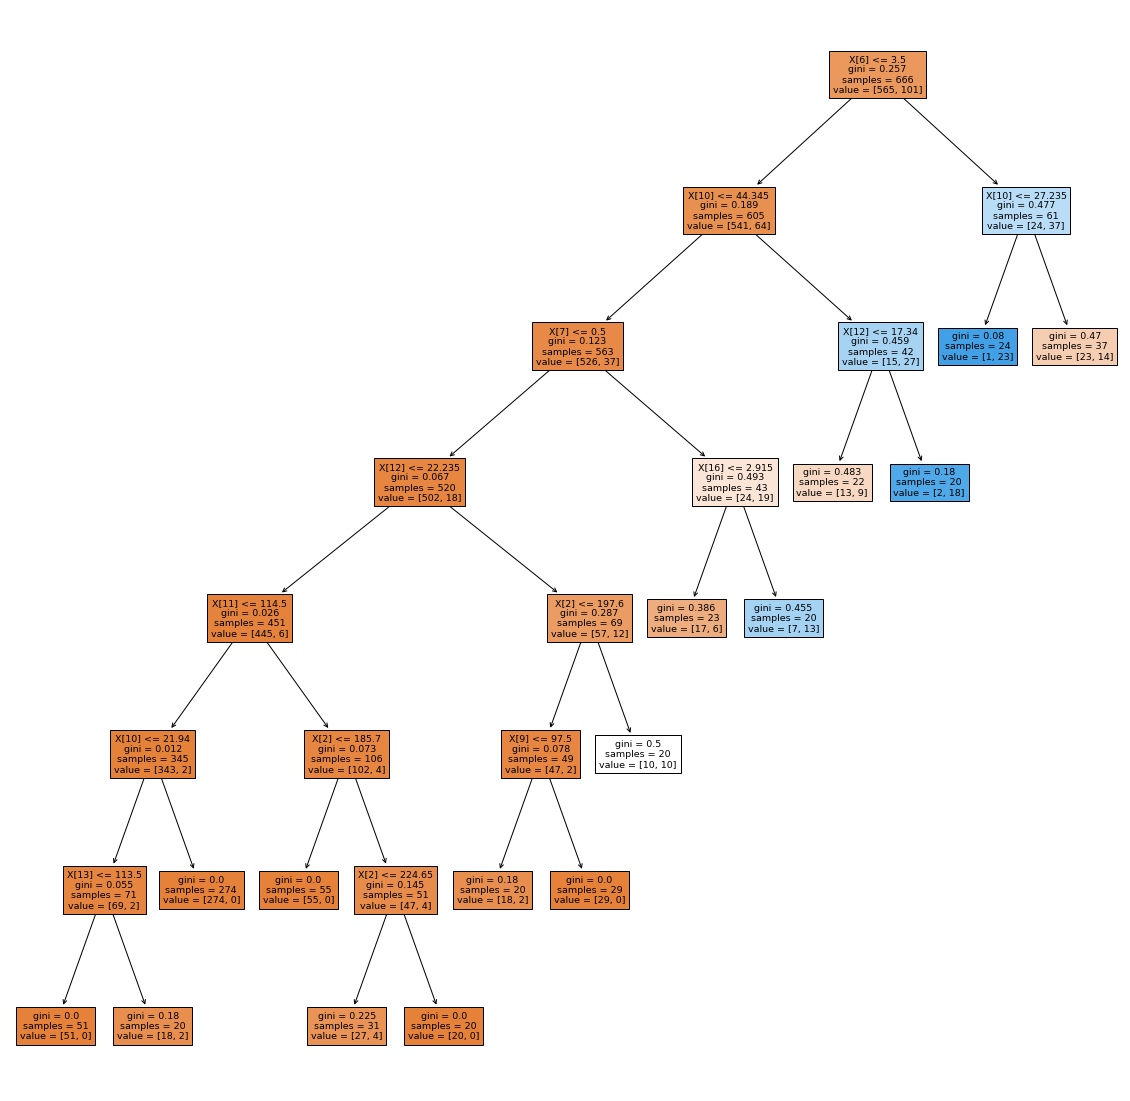

In [41]:
plt.figure(figsize=[20,20])
plot_tree(clf,filled =True)


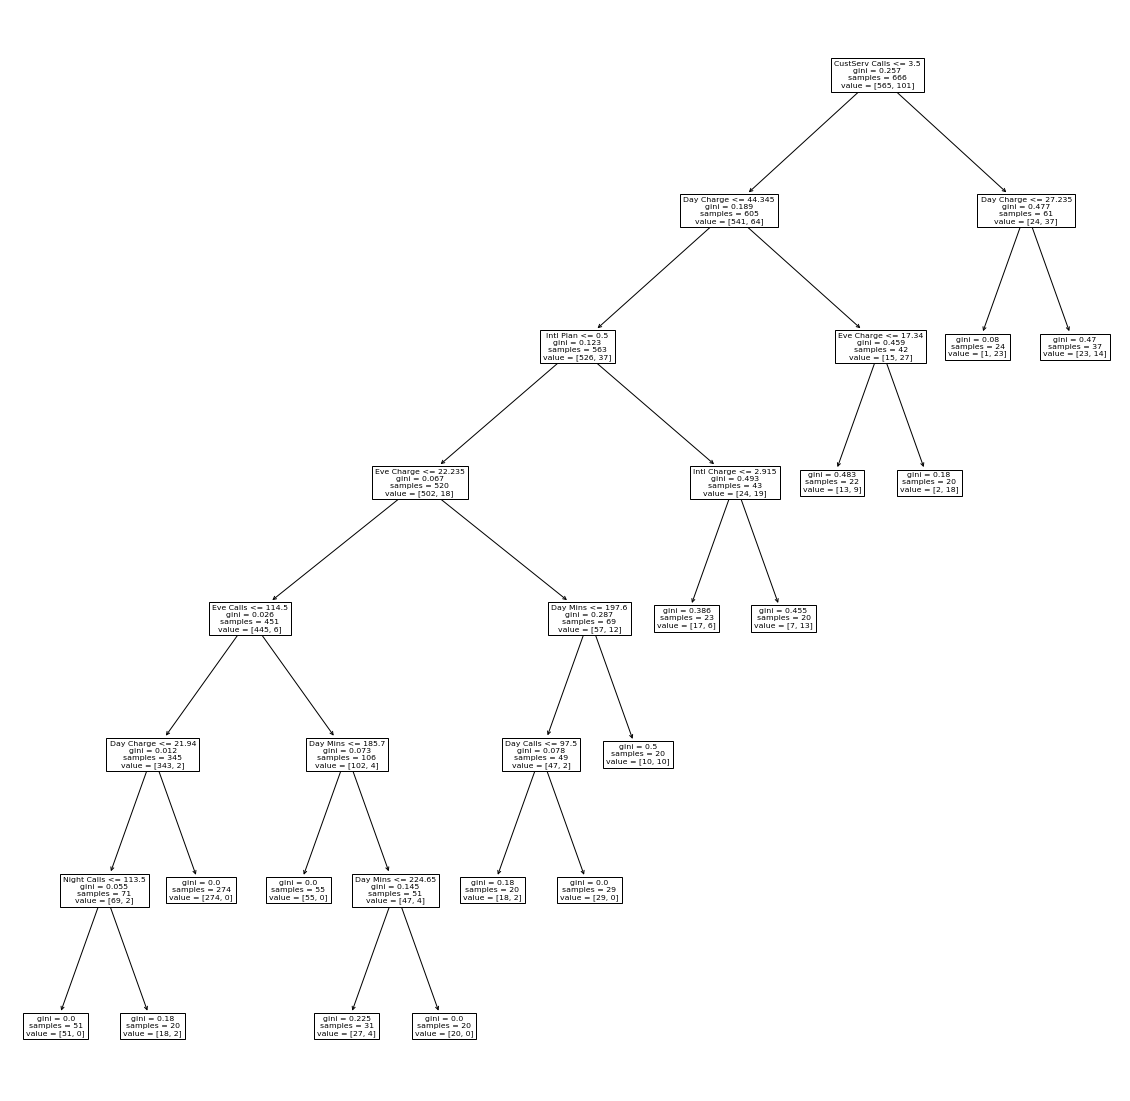

In [42]:
plt.figure(figsize=[20,20])
tree.plot_tree(clf,feature_names=x.columns)
plt.show()

In [43]:
y_pred1 = clf.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [44]:
confusion_matrix(y_test,y_pred1)

array([[2188,   97],
       [ 193,  189]], dtype=int64)

In [45]:
accuracy_score(y_test,y_pred1)

0.8912635920509936

In [46]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2285
           1       0.66      0.49      0.57       382

    accuracy                           0.89      2667
   macro avg       0.79      0.73      0.75      2667
weighted avg       0.88      0.89      0.88      2667



In [47]:
predicted_values1 = y_pred1
predicted_values1

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [48]:
my_submission1 = pd.DataFrame({'Actual_value': y_test[0:], 'predicted_values': predicted_values1})

my_submission1

,Actual_value,predicted_values
2360,0,0
600,0,0
1501,0,0
1114,0,0
517,0,0
...,...,...
3093,1,0
1952,0,0
66,0,0
1055,0,0
